In [30]:
#                                    Imputation (filling missing values) in Numerical column
# mean/median imputation, Arbitrary imputation, End of distribution imputation, Random imputation 

In [31]:
# 1. mean/median (for normal distribution mean will be better and for skewed distribution median will be better)
# cons: not much reliable, can change distribution of data, can introduce outliers, alter covariance/correlation between columns

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [34]:
df = pd.read_csv('csv files/titanic_toy.csv')
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [35]:
df.isnull().mean()*100
# Age has 19.86% and Fare has 5% missing values

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [36]:
x = df.drop(columns=['Survived'])   # feature
y = df['Survived']                  # target

In [37]:
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size=.2, random_state=11)
X_train.isnull().mean()*100

Age       18.820225
Fare       4.915730
Family     0.000000
dtype: float64

In [41]:
# let's impute using numpy and pandas
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

# filling missing values
X_train['age_filled_with_mean'] = X_train['Age'].fillna(mean_age)
X_train['age_filled_with_median'] = X_train['Age'].fillna(median_age)

X_train['fare_filled_with_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['fare_filled_with_median'] = X_train['Fare'].fillna(median_fare)
# fillna will not alter present value it only fill where there is missing place

In [42]:
X_train.sample(5)

,Age,Fare,Family,age_filled_with_mean,age_filled_with_median,fare_filled_with_mean,fare_filled_with_median
568,NaN,7.2292,0,29.60583,28.0,7.2292,7.2292
654,18.0,6.7500,0,18.00000,18.0,6.7500,6.7500
773,NaN,7.2250,0,29.60583,28.0,7.2250,7.2250
779,43.0,211.3375,1,43.00000,43.0,211.3375,211.3375
759,33.0,86.5000,0,33.00000,33.0,86.5000,86.5000


In [51]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after mean imputation: ', X_train['age_filled_with_mean'].var())
print('Age Variance after median imputation: ', X_train['age_filled_with_median'].var())

print()

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after mean imputation: ', X_train['fare_filled_with_mean'].var())
print('Fare Variance after median imputation: ', X_train['fare_filled_with_median'].var())
# since age column have about 19% of missing value so variance shrink in age also high but not in fare

Original Age variable variance:  213.5172805049984
Age Variance after mean imputation:  173.27633031137003
Age Variance after median imputation:  173.6708624802462

Original Fare variable variance:  2686.9632753477094
Fare Variance after mean imputation:  2554.693634507808
Fare Variance after median imputation:  2571.0565152445106


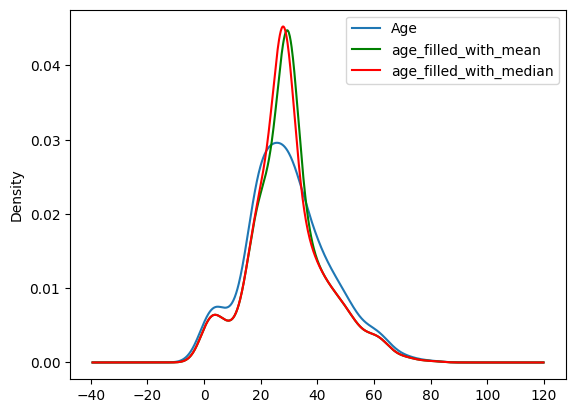

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the mean
X_train['age_filled_with_mean'].plot(kind='kde', ax=ax, color='green')

# variable imputed with the median
X_train['age_filled_with_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
# distributions before and after filling missing values with mean and median differ much . Red Flag

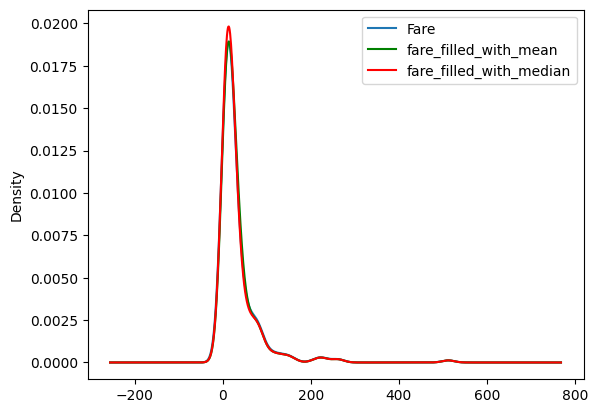

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the mean
X_train['fare_filled_with_mean'].plot(kind='kde', ax=ax, color='green')

# variable imputed with the median
X_train['fare_filled_with_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
# Distributions almost same . Green flag

In [52]:
X_train.cov()

,Age,Fare,Family,age_filled_with_mean,age_filled_with_median,fare_filled_with_mean,fare_filled_with_median
Age,213.517281,85.130094,-6.981553,213.517281,213.517281,80.774459,81.347199
Fare,85.130094,2686.963275,17.073910,68.945063,71.942732,2686.963275,2686.963275
Family,-6.981553,17.073910,2.647987,-5.665761,-5.639902,16.233422,16.219239
age_filled_with_mean,213.517281,68.945063,-5.665761,173.276330,173.276330,65.551143,66.015941
age_filled_with_median,213.517281,71.942732,-5.639902,173.276330,173.670862,68.401248,68.799025
fare_filled_with_mean,80.774459,2686.963275,16.233422,65.551143,68.401248,2554.693635,2554.693635
fare_filled_with_median,81.347199,2686.963275,16.219239,66.015941,68.799025,2554.693635,2571.056515


In [53]:
X_train.corr()

,Age,Fare,Family,age_filled_with_mean,age_filled_with_median,fare_filled_with_mean,fare_filled_with_median
Age,1.000000,0.105165,-0.322917,1.000000,1.000000,0.103113,0.103459
Fare,0.105165,1.000000,0.200634,0.100567,0.104816,1.000000,1.000000
Family,-0.322917,0.200634,1.000000,-0.264503,-0.262997,0.197371,0.196570
age_filled_with_mean,1.000000,0.100567,-0.264503,1.000000,0.998863,0.098524,0.098906
age_filled_with_median,1.000000,0.104816,-0.262997,0.998863,1.000000,0.102691,0.102959
fare_filled_with_mean,0.103113,1.000000,0.197371,0.098524,0.102691,1.000000,0.996813
fare_filled_with_median,0.103459,1.000000,0.196570,0.098906,0.102959,0.996813,1.000000


<Axes: >

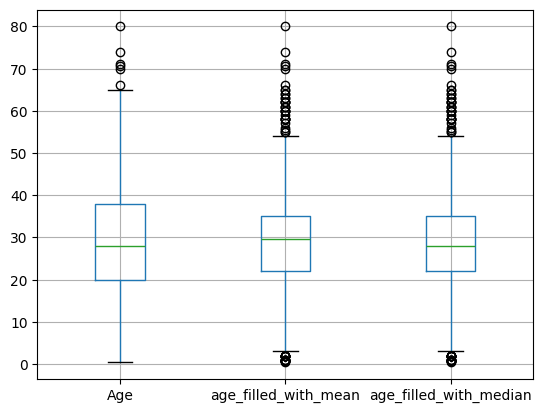

In [55]:
X_train[['Age', 'age_filled_with_mean', 'age_filled_with_median']].boxplot()
# intro of outliers 

<Axes: >

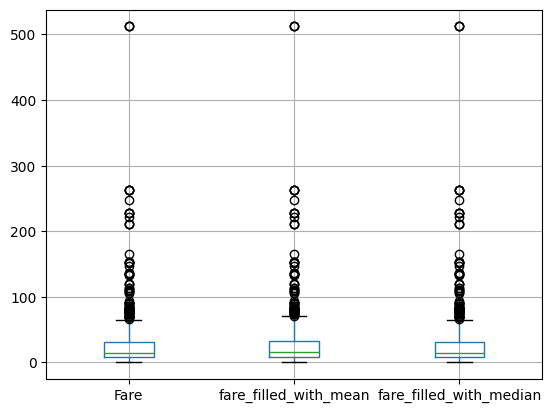

In [56]:
X_train[['Fare', 'fare_filled_with_mean', 'fare_filled_with_median']].boxplot()

In [57]:
# Conclusion : its ok to fill missing values in 'Fare' column with mean/median but not in 'Age' column as there are lot of missing values .  